In [2]:
# Data Processing
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix


# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [3]:
from sklearn import datasets

bank_data=pd.read_csv("C:/Users/autad/OneDrive/Desktop/ML/bank_data_large.csv")


In [4]:
bank_data.head()

,age,default,cons.price.idx,cons.conf.idx,y
0,56,no,94.087,-35.8,no
1,69,no,94.575,-38.9,no
2,46,no,92.978,-44.1,no
3,32,no,92.661,-41.6,no
4,60,no,94.133,-44.9,yes


In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             100 non-null    int64  
 1   default         100 non-null    object 
 2   cons.price.idx  100 non-null    float64
 3   cons.conf.idx   100 non-null    float64
 4   y               100 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB


In [6]:
bank_data.isnull()

,age,default,cons.price.idx,cons.conf.idx,y
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
95,False,False,False,False,False
96,False,False,False,False,False
97,False,False,False,False,False
98,False,False,False,False,False


In [7]:
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

In [8]:
X = bank_data.drop('y', axis=1)
y = bank_data['y']
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
y_pred = rf.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


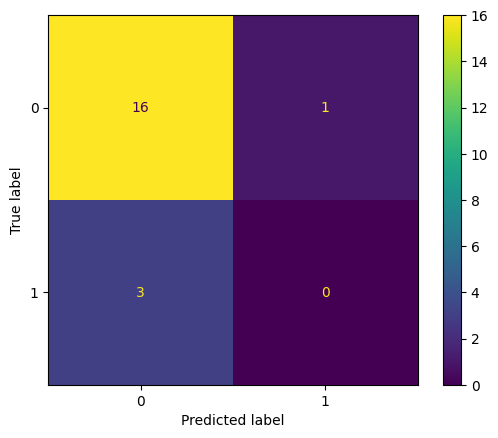

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
conf=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot()

In [17]:

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.00      0.00      0.00         3

    accuracy                           0.80        20
   macro avg       0.42      0.47      0.44        20
weighted avg       0.72      0.80      0.76        20



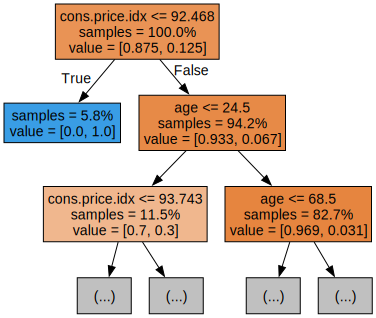

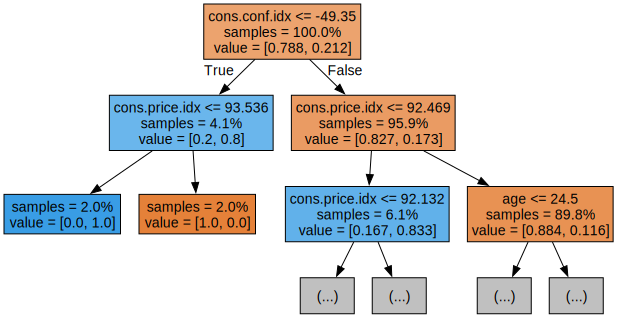

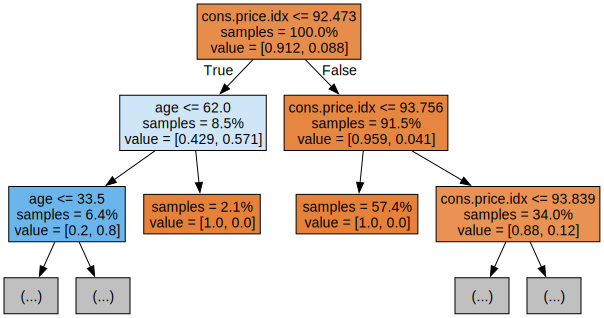

In [18]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [19]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': <scipy.stats....0023BA8AC9D10>, 'n_estimators': <scipy.stats....0023BA6BF1E80>}"
,n_iter,5
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [20]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 321}


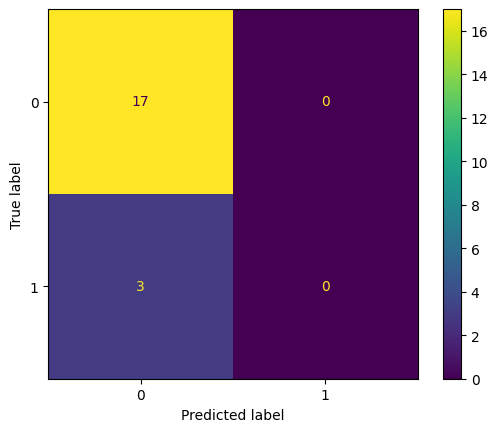

In [21]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [22]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

NameError: name 'knn' is not defined